# Laboratorio 1 - Reinforcement Learning
## Grupo 10
## Integrantes:

- Mario Guerra - Carné: 21008
- Diego Hernández - Carné: 21270
- Linda Jiménez - Carné: 21169

In [9]:
import numpy as np
import random
import matplotlib.pyplot as plt

# Task 1

Responda a cada de las siguientes preguntas de forma clara y lo más completamente posible.

1.	¿Qué pasa si algunas acciones tienen probabilidades de cero?
-	En caso de que sea así, esto quiere decir que el agente nunca seleccionará dichas acciones, por lo que no son exploradas. Aunque, si en alguna de ellas existiera una recompensa mayor, el agente no podría saberlo y puede ser un problema crítico en entornos no deterministas al no evaluarlas correctamente.

2.	¿Qué pasa si la póliza es determinística?

    a.	π1(a) = 1 para algún a

- Una póliza determinista asigna la probabilidad de 1 a esta única acción específica en un estado y 0 al resto. Esto quiere decir que cada vez que se encuentre en el estado, tomará la misma acción.

3.	Investigue y defina a qué se le conoce como cada uno de los siguientes términos, asegúrese de definir en qué consiste cada una de estas variaciones y cómo difieren de los k-armed bandits.

    a.	Contextual bandits

- Son bandits que observan el contexto en su entorno antes de elegir una acción, dependiendo así la recompensa de dicho contexto. Su diferencia radica que en los k-armed bandits no existe un contexto, solo se aprende de qué acción tiene mayor recompensa en general.

    b.	Dueling bandits

- El agente compara dos acciones a la vez y se obtiene una retroalimentación relativa con respecto a cuál fue mejor en vez de brindar una recompensa numérica. Su diferencia con k-armed bandits es que no hay una recompensa directa por acción sino una comparación entre dos acciones.

    c.	Combination bandits

- El agente selecciona una combinación de varias acciones en cada paso, recibiendo una recompensa por el conjunto. En lugar de que exista una sola acción, con el caso de los k-armed bandits, la diferencia es que se toman decisiones sobre conjuntos de ellas, lo cual aumenta su complejidad.



# Task 2

1. Crea una clase Bandit para representar el entorno. Esta clase debería inicializar 10 brazos, cada uno con una probabilidad de recompensa elegida al azar entre 0 y 1.

2. La clase debe tener un método pull(arm) que devuelva una recompensa de 1 con la probabilidad específica del brazo elegido y 0 en caso contrario.

In [2]:
# Clase Bandit
class Bandit:
    def __init__(self, num_arms=10):
        self.num_arms = num_arms
        self.probabilities = np.random.rand(num_arms)  # Probabilidades entre 0 y 1.

    # Método Pull
    def pull(self, arm):
        return 1 if random.random() < self.probabilities[arm] else 0

3. Cree una clase de Agent para implementar la estrategia de épsilon-greedy.

4. Inicialice el agente con un valor épsilon específico para la exploración, una matriz para almacenar las recompensas estimadas para cada brazo (inicializada en cero) y una matriz para contar la cantidad de
veces que se ha extraído cada brazo.

5. Implemente un método select_arm() en la clase Agent que:
   
    a. Con probabilidad épsilon, selecciona un brazo aleatorio.
   
    b. Con probabilidad 1−ε, selecciona el brazo con la recompensa estimada más alta.

6. Implemente un método update_estimates(arm, recompensa) para actualizar la recompensa estimada para el brazo elegido usando la fórmula vista en clase.

In [3]:
# Clase Agent
class Agent:
    def __init__(self, num_arms=10, epsilon=0.1):
        # Elementos de la clase, en los que incluye el valor epsilon, el número de brazos, una matriz para almacenar las recompensas del brazo
        # y una matriz para el conteo de veces que se ha extraído cada brazo.
        self.epsilon = epsilon
        self.num_arms = num_arms
        self.counts = np.zeros(num_arms)
        self.values = np.zeros(num_arms)

    def select_arm(self):
        # Selección de brazo usando la estrategia epsilon-greedy
        if random.random() < self.epsilon:
            return random.randint(0, self.num_arms - 1) # Explorar 
        else:
            return np.argmax(self.values) # Explotar

    def update_estimates(self, arm, reward):
        # Actualización de las estimaciones de recompensa para el brazo elegido
        self.counts[arm] += 1
        n = self.counts[arm]
        value = self.values[arm]
        # Fórmula para actualizar la recompensa estimada
        self.values[arm] = value + (reward - value) / n 

7. Inicialice Bandit y Agent con épsilon configurado en 0.1.

In [4]:
bandit = Bandit()
agent = Agent(epsilon=0.1)

8. Ejecute la simulación para 1,000 iteraciones.
9. En cada prueba, seleccione un brazo usando select_arm(), tire del brazo en el entorno Bandit para obtener
una recompensa y actualice las recompensas estimadas usando update_estimates().
10. Realice un seguimiento e imprima la recompensa acumulada al final de la simulación.

In [ ]:
total_rewards = []
cumulative_rewards = []

reward_sum = 0

# Bucle 1000 iteraciones
for i in range(1000): 
    arm = agent.select_arm()                      # Elegir brazo
    reward = bandit.pull(arm)                     # Obtener recompensa
    agent.update_estimates(arm, reward)           # Update de recompensas estimadas

    total_rewards.append(reward)                  # Array recompensas individuales

    reward_sum += reward
    cumulative_rewards.append(reward_sum)         # Array recompensa acumulada

# Recompensa total
print("Recompensa total después de 1000 iteraciones:", reward_sum)

Recompensa total después de 1000 iteraciones: 902


11. Grafique la recompensa acumulada en las pruebas para visualizar la mejora del desempeño del agente.

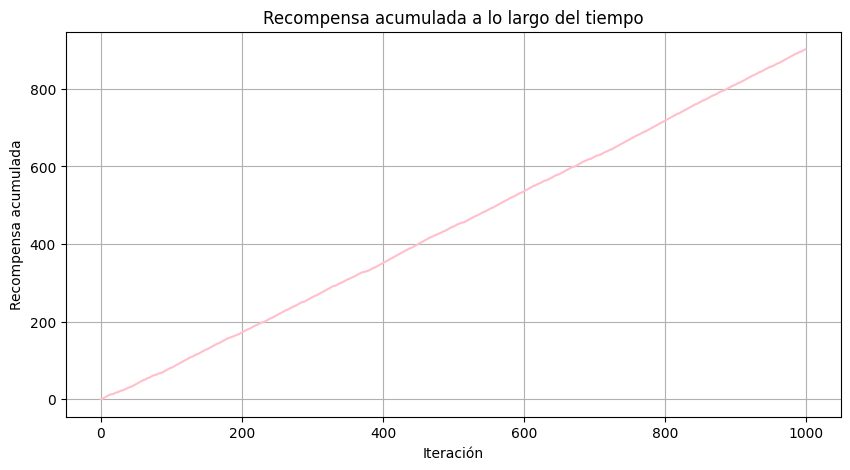

In [38]:
plt.figure(figsize=(10, 5))
plt.plot(cumulative_rewards, color='pink')
plt.title("Recompensa acumulada a lo largo del tiempo")
plt.xlabel("Iteración")
plt.ylabel("Recompensa acumulada")
plt.grid(True)
plt.show()

12. Grafique los valores estimados de cada brazo versus las probabilidades reales para evaluar la precisión de las estimaciones.

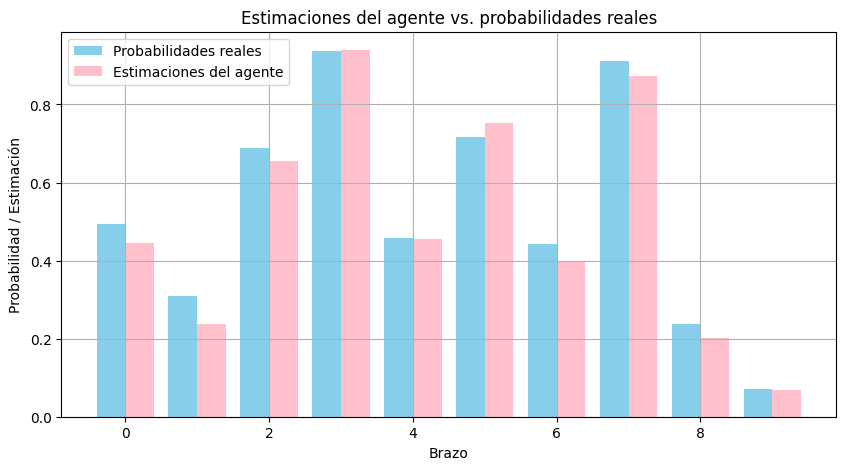

In [37]:
plt.figure(figsize=(10, 5))
plt.bar(np.arange(bandit.num_arms) - 0.2, bandit.probabilities, width=0.4, label="Probabilidades reales", color='skyblue')
plt.bar(np.arange(bandit.num_arms) + 0.2, agent.values, width=0.4, label="Estimaciones del agente", color='pink')
plt.title("Estimaciones del agente vs. probabilidades reales")
plt.xlabel("Brazo")
plt.ylabel("Probabilidad / Estimación")
plt.legend()
plt.grid(True)
plt.show()


Como resultado final podemos ver que para la mayoría de los brazos, las estimaciones del agente están bastante cerca de las probabilidades reales demostrando un buen equilibrio entre exploración y explotación. Así también podemos ver como la recompensa acumulada va en aumento siendo practicamente lineal, llegando a una recompensa de 902 de las 1000 iteraciones para un epsilon de 0.1 por lo que el agente fue capaz de identificar correctamente los mejores brazos.

### Experimentación con diferentes valores de épsilon

In [147]:
epsilon = [0.01, 0.1, 0.2, 0.3, 0.4, 0.5]

Recompensa total después de 1000 iteraciones: 660


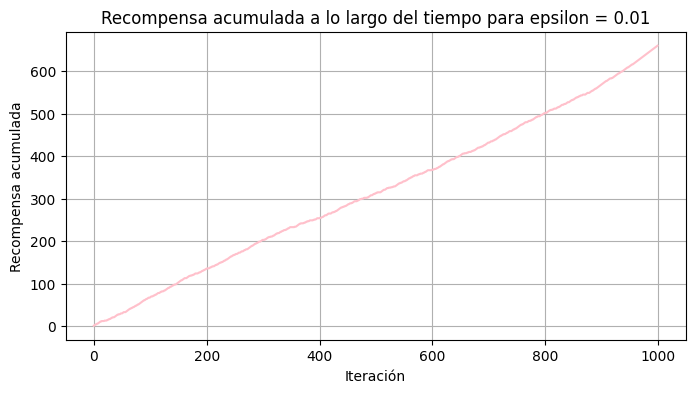

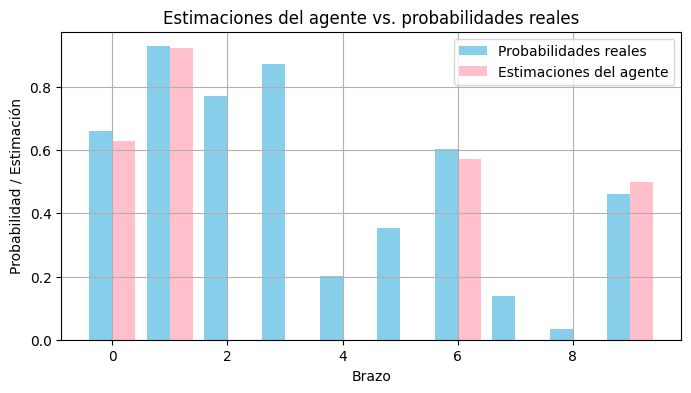

Recompensa total después de 1000 iteraciones: 844


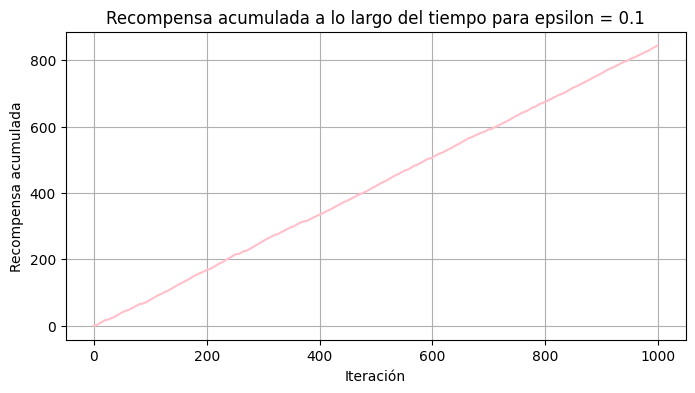

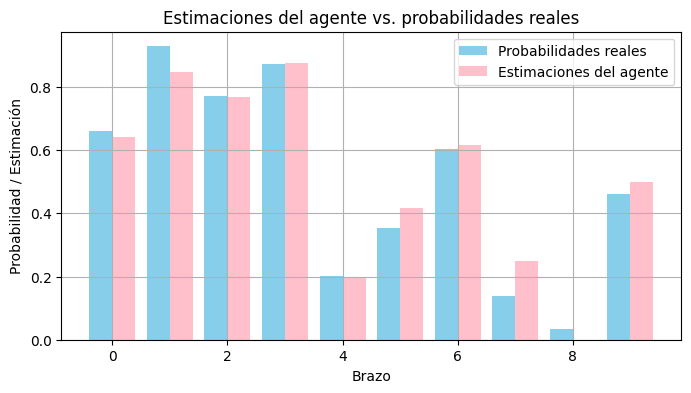

Recompensa total después de 1000 iteraciones: 837


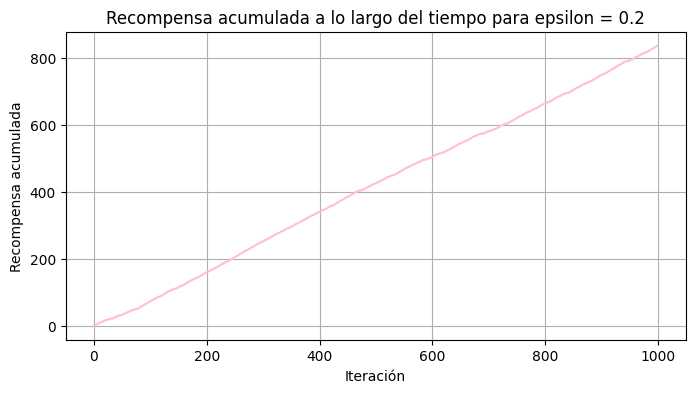

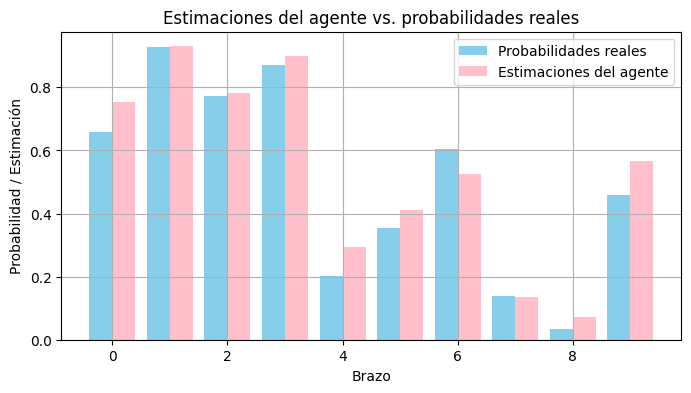

Recompensa total después de 1000 iteraciones: 813


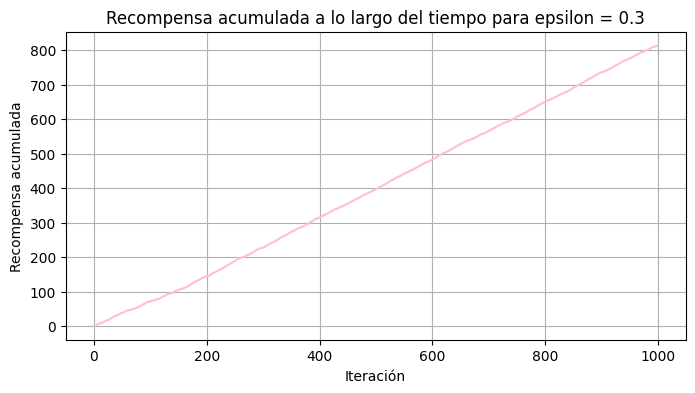

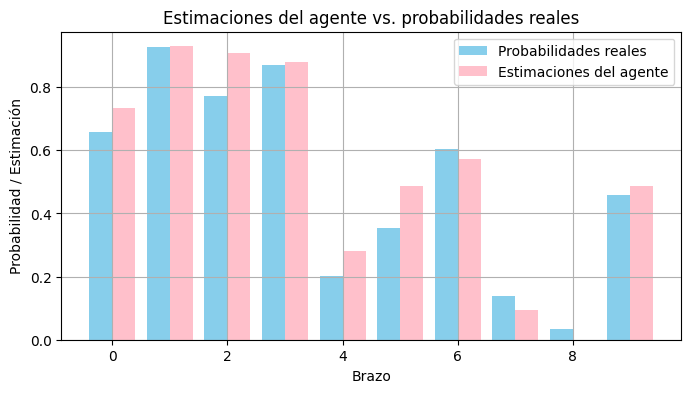

Recompensa total después de 1000 iteraciones: 739


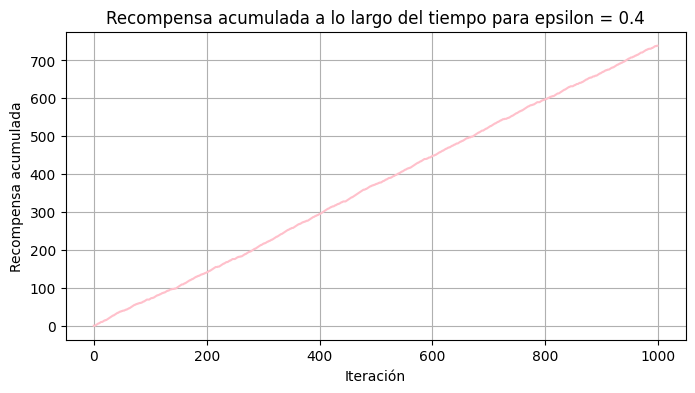

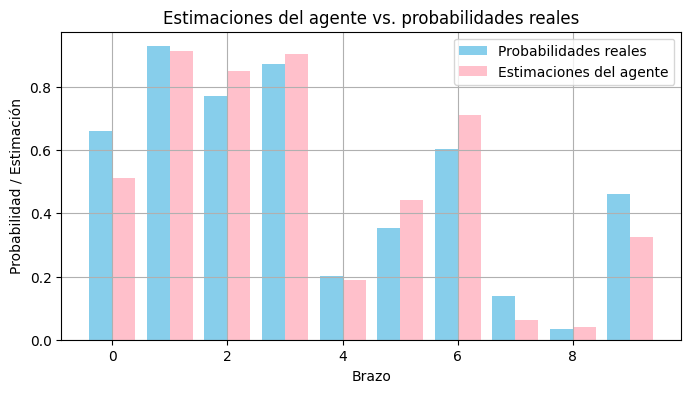

Recompensa total después de 1000 iteraciones: 704


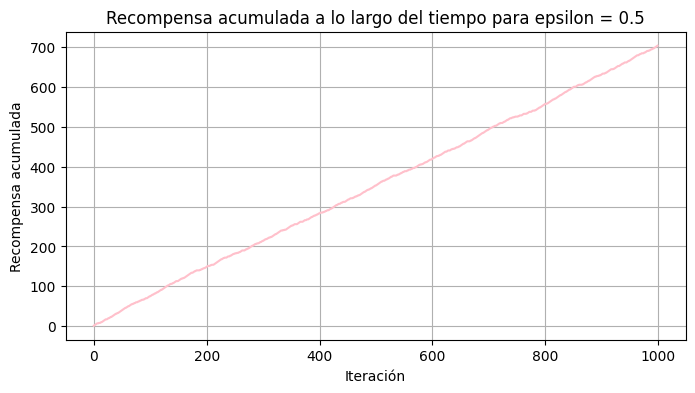

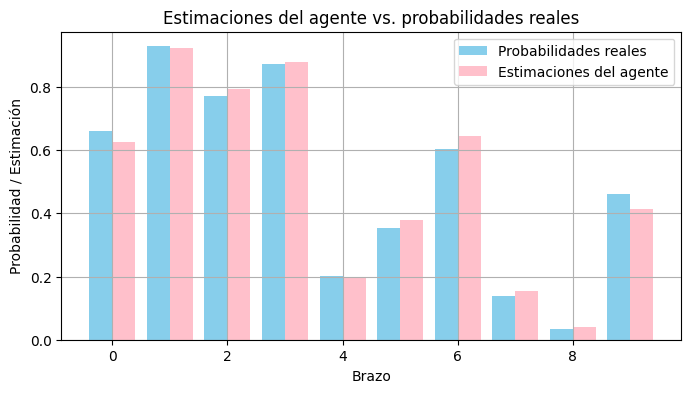

In [152]:
for eps in epsilon:
    agent = Agent(epsilon=eps)
    total_rewards = []
    cumulative_rewards = []
    reward_sum = 0

    for i in range(1000):
        arm = agent.select_arm()
        reward = bandit.pull(arm)
        agent.update_estimates(arm, reward)

        total_rewards.append(reward)
        reward_sum += reward
        cumulative_rewards.append(reward_sum)

    print("Recompensa total después de 1000 iteraciones:", reward_sum)
    plt.figure(figsize=(8, 4))
    plt.plot(cumulative_rewards, color='pink')
    plt.title("Recompensa acumulada a lo largo del tiempo para epsilon = {}".format(eps))
    plt.xlabel("Iteración")
    plt.ylabel("Recompensa acumulada")
    plt.grid(True)
    plt.show()

    plt.figure(figsize=(8, 4))
    plt.bar(np.arange(bandit.num_arms) - 0.2, bandit.probabilities, width=0.4, label="Probabilidades reales", color='skyblue')
    plt.bar(np.arange(bandit.num_arms) + 0.2, agent.values, width=0.4, label="Estimaciones del agente", color='pink')
    plt.title("Estimaciones del agente vs. probabilidades reales")
    plt.xlabel("Brazo")
    plt.ylabel("Probabilidad / Estimación")
    plt.legend()
    plt.grid(True)
    plt.show()
    

Luego de experimentar con diferentes valores de epsilon: [0.01, 0.1, 0.2, 0.3, 0.4, 0.5] podemos ver que los valores más altos de recompensa total se obtuvieron con epsilon de 0.1 siendo 859 y 0.2 siendo 847, seguidos por epsilon de 0.3 con 786, 0.4 con 731, y 0.5 con 728. El valor más bajo correspondió a epsilon de 0.01 con 642, lo cual indica una exploración insuficiente. 

Las gráficas muestran que las epsilon 0.1 y 0.2 permiten al agente identificar y explotar eficazmente los mejores brazos, logrando una recompensa acumulada alta y estimaciones muy cercanas a las probabilidades reales. En cambio los valores de epsilon más altos resultan en exploración excesiva y menor rendimiento, mientras que el valor demasiado bajo limita el aprendizaje inicial. 

En conclusión, un valor intermedio como lo fue ε = 0.1 representa el mejor equilibrio entre exploración y explotación, maximizando la recompensa acumulada y la precisión en las estimaciones del agente.